<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/0905_Classification_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 분류 연습 문제**
___
출처 : 핸즈온 머신러닝 Ch03 분류 연습문제 1, 2번

In [1]:
# import data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

In [2]:
X, y = mnist["data"], mnist["target"]

### **1. MNIST 데이터셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요.**
___

1. `KNeghtborsClassifier`를 사용하는 것을 추천합니다. 
2. `weights`와 `n_neighbors` 하이퍼 파라미터로 그리드 탐색을 시도하여, 좋은 하이퍼 파라미터 값을 찾아보세요.

In [14]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# import package
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [6]:
#train, test 데이터 만들기
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [30]:
# Try GridSearch to optimize hyperparameter

from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid_params = {'n_neighbors' : [3,4,5], 'weights' : ["uniform", "distance"]}

gs = GridSearchCV(knn, grid_params, cv=3, verbose=3)
gs.fit(X_train, y_train)
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  50.4s
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  48.7s
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  53.3s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  50.0s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time= 1.0min
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  49.5s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  54.3s
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.966 total time=  54.2s
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  55.2s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.971 total time=  54.1s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.970 total time=  53.4s
[CV 3/3] END ...n_neighbors=4, weights=distance;,

### **2. 다음 단계를 따라 인위적으로 훈련 세트를 늘리는 데이터 증식 또는 훈련 세트 확장 기법을 연습해봅시다.**
___

#### **STEP 1. MNIST 이미지를 (왼, 오른, 위, 아래) 어느 방향으로든 한 픽셀 이동시킬 수 있는 함수를 만들어 보세요.**

In [32]:
# import library
from scipy.ndimage.interpolation import shift

# function
def shift_mnist(image,x,y):
  image = image.reshape(28, 28)
  shift_image = shift(image,[y,x],mode='constant')
  return shift_image.reshape([-1])

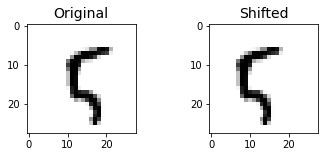

In [33]:
# 함수 테스트
image=X_train[100]
shift_image=shift_mnist(image,-3,0)

plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(1,2,2)
plt.title("Shifted", fontsize=14)
plt.imshow(shift_image.reshape(28, 28), interpolation="nearest", cmap="Greys")

####  **STEP 2. 앞에서 만든 함수를 이용하여, 훈련 세트에 있는 각 이미지에 대해 네 개의 이동된 복사본(방향마다 한 개씩)을 만들어 훈련 세트에 추가하세요**

In [37]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_mnist(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

####  **STEP 3. 위에서 확장한 데이터셋을 이용하여, 1번 문제에서 찾은 최적 모델을 훈련시키고, 테스트 세트에서 정확도를 측정해보세요**

In [40]:
knn = KNeighborsClassifier(**gs.best_params_)
knn.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [41]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763